#**Trees homework**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction import DictVectorizer
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv"
df = pd.read_csv(url)
df = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]

df.head(10)

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
5,190,NaN,2484.883986,2008,17.271818
6,240,127.0,3006.542287,2012,13.210412
7,150,239.0,3638.657780,2020,12.848884
8,250,174.0,2714.219310,2016,16.823554
9,150,123.0,3509.036569,2005,12.298355


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   horsepower           8996 non-null   float64
 2   vehicle_weight       9704 non-null   float64
 3   model_year           9704 non-null   int64  
 4   fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 379.2 KB


In [4]:
df.describe(include='all', percentiles=[.01,.05,.25,.5,.75,.95,.99]).T

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
engine_displacement,9704.0,199.708368,49.455319,10.000000,80.000000,120.000000,170.000000,200.000000,230.000000,280.000000,310.000000,380.000000
horsepower,8996.0,149.657292,29.879555,37.000000,80.000000,101.000000,130.000000,149.000000,170.000000,200.000000,218.000000,271.000000
vehicle_weight,9704.0,3001.280993,497.894860,952.681761,1841.379222,2180.951872,2666.248985,2993.226296,3334.957039,3819.762217,4177.957153,4739.077089
model_year,9704.0,2011.484027,6.659808,2000.000000,2000.000000,2001.000000,2006.000000,2012.000000,2017.000000,2022.000000,2023.000000,2023.000000
fuel_efficiency_mpg,9704.0,14.985243,2.556468,6.200971,8.996637,10.762305,13.267459,15.006037,16.707965,19.150022,20.882064,25.967222


Text(0.5, 1.0, 'Distribution of fuel efficiency mpg')

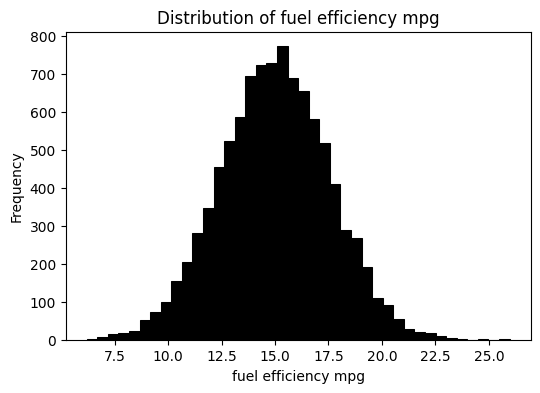

In [5]:
plt.figure(figsize=(6, 4))

sns.histplot(df["fuel_efficiency_mpg"], bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('fuel efficiency mpg')
plt.title('Distribution of fuel efficiency mpg')

###**Preparing the dataset**

Preparation:
- Fill missing values with zeros.
- Do train/validation/test split with 60%/20%/20% distribution.
- Use the train_test_split function and set the random_state parameter to 1.
- Use DictVectorizer(sparse=True) to turn the dataframes into matrices.

In [6]:
df = df.fillna(0)

In [7]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [8]:
len(df_train), len(df_val), len(df_test)

(5822, 1941, 1941)

In [9]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [10]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [11]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

val_test = df_test.to_dict(orient='records')
X_test = dv.transform(val_test)

###**<font color='red'>Question 1</font>**
Let's train a decision tree regressor to predict the `fuel_efficiency_mpg` variable.

Train a model with `max_depth=1`.

Which feature is used for splitting the data?
- <font color='green'>`'vehicle_weight'`</font> ✅
- `'model_year'`
- `'origin'`
- `'fuel_type'`



In [12]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

names = dv.get_feature_names_out().tolist()
export_text(dt, feature_names=names)

'|--- vehicle_weight <= 3022.11\n|   |--- value: [16.88]\n|--- vehicle_weight >  3022.11\n|   |--- value: [12.94]\n'

###**<font color='red'>Question 2</font>**
Train a random forest regressor with these parameters:
- `n_estimators=10`
- `random_state=1`
- `n_jobs=-1` (optional - to make training faster)

What's the RMSE of this model on the validation data?
- 0.045
- <font color='green'>0.45</font> ✅
- 4.5
- 45.0

In [13]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)
np.sqrt(mean_squared_error(y_val, y_pred)).round(2)

np.float64(0.52)

###**<font color='red'>Question 3</font>**
Now let's experiment with the `n_estimators` parameter
- Try different values of this parameter from 10 to 200 with step 10.
- Set `random_state` to `1`.
- Evaluate the model on the validation dataset.

After which value of `n_estimators` does RMSE stop improving? Consider 3 decimal places for calculating the answer.
- 10
- 25
- <font color='green'>80</font> ✅
- 200

If it doesn't stop improving, use the latest iteration number in your answer.

In [14]:
scores = []
for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred)).round(3)

    scores.append((n, rmse))

In [15]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])

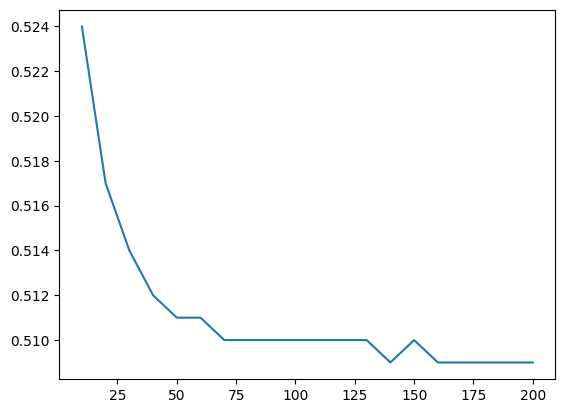

In [16]:
plt.plot(df_scores.n_estimators, df_scores.rmse)

###**<font color='red'>Question 4</font>**

Let's select the best max_depth:
- Try different values of `max_depth`: `[10, 15, 20, 25]`
- For each of these values,
  - try different values of `n_estimators` from 10 till 200 (with step 10)
  - calculate the mean RMSE
- Fix the random seed: `random_state`=1

What's the best `max_depth`, using the mean RMSE?
- <font color='green'>10</font> ✅
- 15
- 20
- 25

In [21]:
results = {}
for d in [10, 15, 20, 25]:
  for n in range(10, 201, 10):
      rmses = []
      rf = RandomForestRegressor(max_depth = d, n_estimators=n, random_state=1)
      rf.fit(X_train, y_train)
      y_pred = rf.predict(X_val)
      rmse = np.sqrt(mean_squared_error(y_val, y_pred))
      rmses.append(rmse)
  results[d] = np.mean(rmses)
  print(f"max_depth={d}, mean RMSE={results[d]:.4f}")

best_depth = min(results, key=results.get)
print("Best max_depth:", best_depth)

max_depth=10, mean RMSE=0.4950
max_depth=15, mean RMSE=0.5067
max_depth=20, mean RMSE=0.5089
max_depth=25, mean RMSE=0.5087
Best max_depth: 10
